In [1]:
install.packages('randomForest')
require(randomForest)
library(rpart)
library(purrr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
sd = sample(1:10000,1)
print(sd)

set.seed(sd)

# Test Set
ta <- runif(100, min = 0, max = 1)
tb <- runif(100, min = 0, max = 1)
tc <- runif(100, min = 0, max = 1)

test <- data.frame(cbind(ta,tb,tc))
colnames(test) <- c('A','B', 'C')

# Train Set
a <- runif(10000, min = 0, max = 1)
b <- runif(10000, min = 0, max = 1)
c <- runif(10000, min = 0, max = 1)

train <- data.frame(cbind(a,b,c))
colnames(train) <- c('A','B', 'C')

train$I <- train$A + train$B + train$C

eq <- I~A+B+C

[1] 6378


In [3]:
set.seed(sd)
ntree = 50
model <- randomForest(eq,data=train,ntree=ntree,keep.inbag=T)

In [4]:
print(model)


Call:
 randomForest(formula = eq, data = train, ntree = ntree, keep.inbag = T) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 1

          Mean of squared residuals: 0.001843561
                    % Var explained: 99.26


In [5]:
## INBAG: n by ntree matrix be returned that keeps track of which samples are “in-bag” in which trees
## But not how many times, if sampling with replacement (Default replace = TRUE)
print(head(model$inbag)) ## 0 means OOB and 1-5 means which # of tree

  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
1    1    0    2    0    0    1    2    0    3     0     1     1     3     1
2    0    1    1    0    1    1    1    2    1     0     2     0     1     0
3    0    1    1    1    0    0    0    1    0     0     0     1     1     1
4    0    4    2    0    0    2    2    1    2     0     1     1     2     1
5    2    1    1    3    1    0    0    0    2     1     0     3     1     1
6    0    0    0    3    0    0    2    1    3     2     2     2     1     0
  [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26] [,27]
1     0     0     1     2     2     2     0     3     2     1     3     3     2
2     1     0     1     0     0     0     1     0     0     0     3     0     2
3     0     2     2     1     1     0     2     2     1     2     0     1     1
4     0     2     0     3     1     0     0     0     0     0     1     1     1
5     0     1     2     1     0     0     0     0     4     0

In [6]:
outbag <- lapply(1:ntree, function(x) which(model[["inbag"]][ ,x] == 0)) ##keeping only the zeros

In [7]:
#print(outbag)

In [8]:
oobpred <- lapply(outbag, function(x) predict(model, train[x, ])) ## Out of bag predictions
#print(oobpred)

In [9]:
mae_function <- function(pred, actual) {
    mean(abs(pred-actual))
}

In [10]:
(oob_err <- map2_dbl(oobpred, outbag, function(x, y) mae_function(x, train[y, ]$I))) # Wi(obs) equation 5 Gajowniczek et.al (2020)
#print(oob_err) ## For each tree

[1] 0.01456474 0.01447881 0.01457398 0.01475982 0.01473117 0.01442663
 [7] 0.01473160 0.01439911 0.01441527 0.01463577 0.01437361 0.01437524
[13] 0.01441171 0.01458536 0.01449132 0.01447806 0.01480350 0.01462969
[19] 0.01454189 0.01432548 0.01443108 0.01473951 0.01471023 0.01447965
[25] 0.01473814 0.01483788 0.01428316 0.01445510 0.01447649 0.01462214
[31] 0.01433732 0.01469043 0.01450693 0.01444499 0.01429223 0.01464717
[37] 0.01456333 0.01467468 0.01441379 0.01423648 0.01431167 0.01457673
[43] 0.01447475 0.01431891 0.01431319 0.01441682 0.01450691 0.01407681
[49] 0.01462947 0.01442726

In [11]:
plot_function <- function(pred, actual) {
    plot(pred,actual)
    lines(actual,actual)
}

In [12]:
#plots <- map2(oobpred, outbag, function(x, y) plot_function(x, train[y, ]$I))
## You can see the pathology here as well
## Can you used to get correction - Work in Progress

In [13]:
## Predicting Test set responses
pred <- predict(model, test, type="response", predict.all=TRUE)
print(head(pred$individual)) #prediction from each tree ## pred$aggregate give simple average prediction 

       [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
1 1.5132465 1.5951254 2.1000435 1.7723197 1.8062632 1.5559367 1.8899598
2 0.8870239 0.8667650 0.9013852 0.9100198 0.9421274 0.7722788 0.9421003
3 2.2038200 2.3821345 1.6199497 2.4460916 2.2695777 2.2028619 2.0285033
4 2.1974275 2.1822579 2.1654155 2.2187944 2.1738898 2.1738898 2.1754421
5 0.9401199 0.9284212 0.8375900 0.9750399 0.8228566 0.7895072 0.7108721
6 1.7861978 1.8625456 1.7898706 1.8249327 1.6953751 1.8746751 1.8244665
      [,8]      [,9]     [,10]     [,11]     [,12]     [,13]     [,14]
1 1.513309 1.6525214 1.5897610 1.6685627 1.5472538 1.5145591 1.5113120
2 1.081402 0.9616037 0.8595945 0.8601225 0.7014758 0.8763024 0.8603133
3 2.133109 2.1932742 2.1354788 2.1801777 2.0690397 2.1481638 2.0896633
4 2.214453 2.0921906 2.1618299 2.1138603 2.1598639 2.2209651 2.2801651
5 1.024652 0.7548447 0.9309289 0.7795907 1.0058681 0.7619510 0.7850539
6 1.812412 1.8746751 1.8102474 1.8169274 1.7966402 1.7574752 1.8120931

In [14]:
## If I rank the tree based on MAE of OOB error for each tree, then I can use equation 9 of Gajowniczek et.al (2020) to calculate weights
Rank <- as.vector(rank(oob_err))
Tree <- c(1:ntree)
rankorder <- as.data.frame(cbind(Tree,Rank))

In [15]:
rankorder$Nominator <- (ntree - rankorder$Rank + 1)^2 # equation 9
#print(rankorder)

In [16]:
sum = sum(rankorder$Nominator)
print(sum)

[1] 42925


In [17]:
normalize <- function(x) {
    return (3*((x - min(x)) / (max(x) - min(x))))
}

In [18]:
rankorder$TreeWts <- (rankorder$Nominator)/sum(rankorder$Nominator) # equation 9 and Table 3
rankorder$TreeWts <- normalize(rankorder$TreeWts)
print(rankorder)

   Tree Rank Nominator     TreeWts
1     1   32       361 0.432172869
2     2   25       676 0.810324130
3     3   33       324 0.387755102
4     4   48         9 0.009603842
5     5   44        49 0.057623049
6     6   17      1156 1.386554622
7     7   45        36 0.042016807
8     8   12      1521 1.824729892
9     9   15      1296 1.554621849
10   10   39       144 0.171668667
11   11   10      1681 2.016806723
12   12   11      1600 1.919567827
13   13   13      1444 1.732292917
14   14   35       256 0.306122449
15   15   27       576 0.690276110
16   16   24       729 0.873949580
17   17   49         4 0.003601441
18   18   38       169 0.201680672
19   19   30       441 0.528211285
20   20    8      1849 2.218487395
21   21   19      1024 1.228091236
22   22   47        16 0.018007203
23   23   43        64 0.075630252
24   24   26       625 0.749099640
25   25   46        25 0.028811525
26   26   50         1 0.000000000
27   27    3      2304 2.764705882
28   28   21       9

In [19]:
print(pred$individual[1,])

 [1] 1.513246 1.595125 2.100043 1.772320 1.806263 1.555937 1.889960 1.513309
 [9] 1.652521 1.589761 1.668563 1.547254 1.514559 1.511312 1.701947 1.649420
[17] 1.701947 1.699042 1.718045 1.523214 1.790704 1.569633 1.551506 1.751667
[25] 1.397569 1.527973 1.654298 1.527531 1.549750 1.530756 1.960899 1.671576
[33] 1.517157 1.449736 1.671405 1.543563 1.553605 1.555937 1.573236 1.514559
[41] 1.808700 1.658668 1.603229 1.471058 1.546038 1.529566 1.408577 1.817047
[49] 1.693702 1.587431


In [20]:
predictions <- vector()
for (i in 1:100){
    wtpredsum = 0
    for (k in 1:ntree){
        wtpred <- pred$individual[i,k] * rankorder$TreeWts[k]
        wtpredsum = wtpredsum + wtpred
    }
    predictions[i] <- wtpredsum/ntree ## equation 3
}

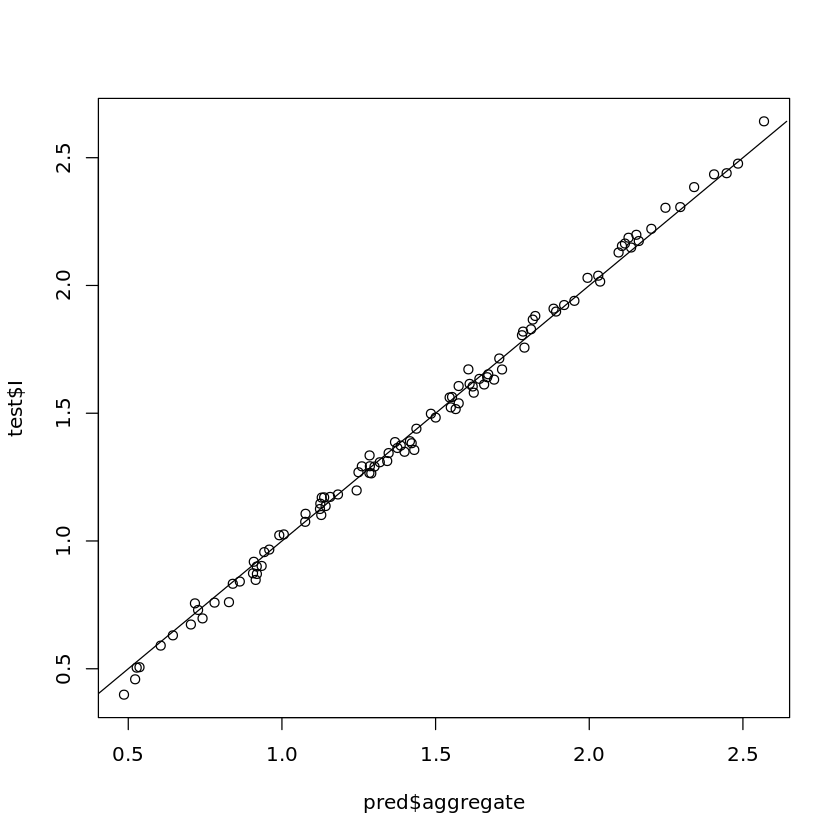

In [21]:
test$I <- test$A + test$B + test$C
plot(pred$aggregate,test$I)
lines(test$I,test$I)

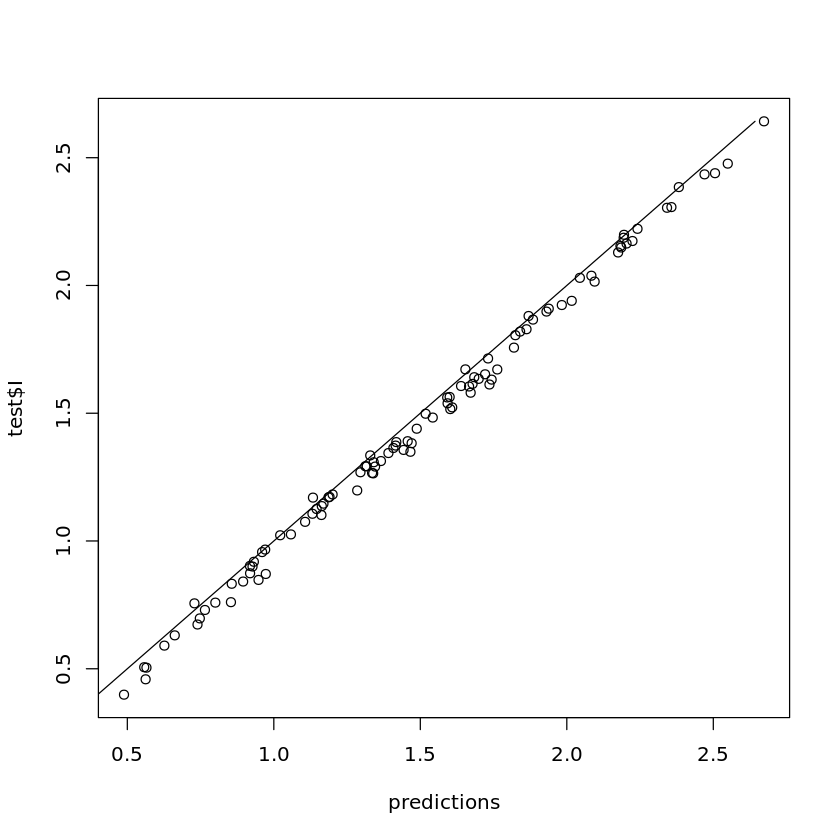

In [22]:
plot(predictions,test$I)
lines(test$I,test$I)